In [ ]:
#Libraries Used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

# Below I am Directly considering the Dortmund city number from the provided dataset

In [ ]:
df= pd.read_excel('/content/drive/MyDrive/SICO2/Book1.xlsx', index_col='Datum', usecols=['Datum', 'Dortmund'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,Dortmund
Datum,
2020-03-15,19
2020-03-16,33
2020-03-17,65
2020-03-19,76
2020-03-20,140
...,...
2020-12-22,12615
2020-12-29,13475
2021-01-04,14203


# Since, the data set has a lot of missing dates, I am updating the complete range of data with Nan values

In [ ]:
"""df = pd.date_range(start='2020-03-15', end='2021-01-07')
zs= [0 for _ in range(len(df))]
df_dt= pd.DataFrame(data=zs, index=df)"""
#df['Datum'] = pd.date_range(start='2020-03-15', end='2021-01-07')Df 
# Adding 20 extra days to the data set
idx= pd.date_range(start='2020-03-15', end='2021-01-27')
df = df.reindex(idx, fill_value= np.NaN)

In [ ]:
df.shape

(319, 1)

In [ ]:
df_index = pd.DataFrame(df)
df_index = df.rename_axis('Datum')

In [ ]:
df_index

,Dortmund
Datum,
2020-03-15,19.0
2020-03-16,33.0
2020-03-17,65.0
2020-03-18,NaN
2020-03-19,76.0
...,...
2021-01-23,NaN
2021-01-24,NaN
2021-01-25,NaN


# Here, I am segregating the data as per prediction and to shape the dataset with missing values using Interpolated 

In [ ]:
df_filling_nan_values = df_index[:-20]
predict_data = df_index[-20:]
print(predict_data.shape, df_filling_nan_values.shape)

(20, 1) (299, 1)


In [ ]:
df_interpolateValues = df_filling_nan_values.interpolate(method='polynomial', order=2)

In [ ]:
df_interpolateValues

,Dortmund
Datum,
2020-03-15,19.000000
2020-03-16,33.000000
2020-03-17,65.000000
2020-03-18,64.442030
2020-03-19,76.000000
...,...
2021-01-03,14117.110755
2021-01-04,14203.000000
2021-01-05,14282.000000


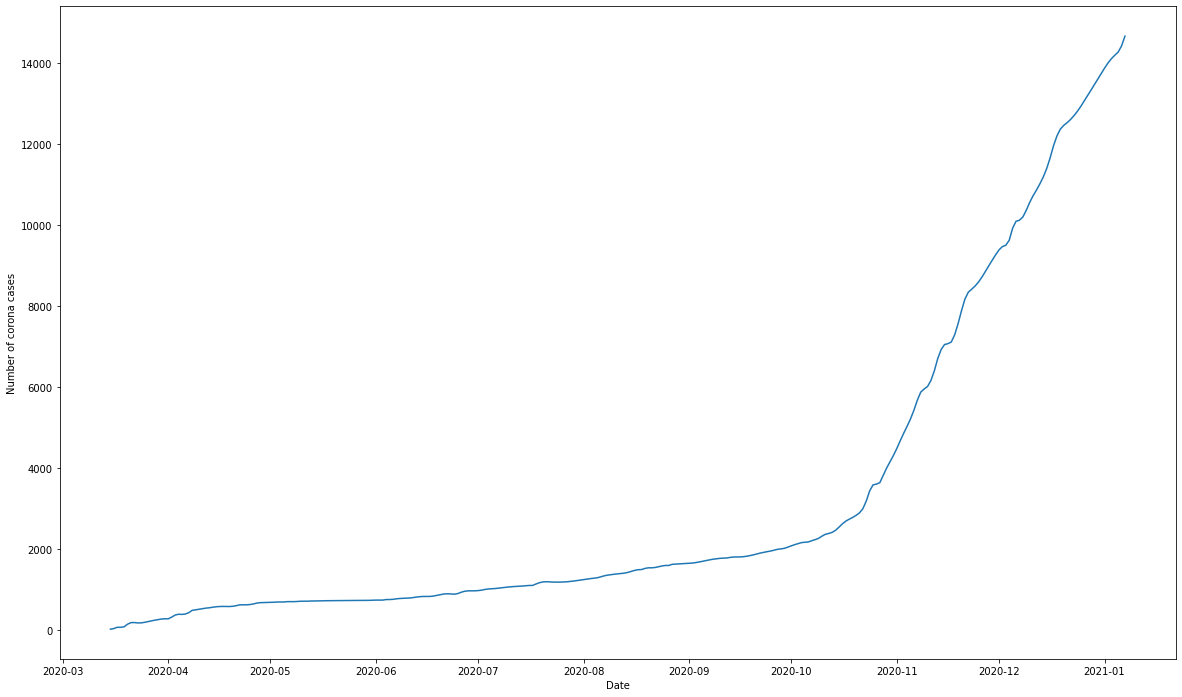

In [ ]:
plt.figure(figsize = (20,12))
plt.xlabel("Date")
plt.ylabel("Number of corona cases")
plt.plot(df_interpolateValues)

# Checking the statinarity using rolling mean and standard deviation

In [ ]:
#determining rolling statistics 
rolmean =  df_interpolateValues.rolling(window=30).mean()
rolstd = df_interpolateValues.rolling(window = 30).std()
print(rolmean, rolstd)

                Dortmund
Datum                   
2020-03-15           NaN
2020-03-16           NaN
2020-03-17           NaN
2020-03-18           NaN
2020-03-19           NaN
...                  ...
2021-01-03  12108.586734
2021-01-04  12251.053400
2021-01-05  12390.461720
2021-01-06  12534.106040
2021-01-07  12683.139374

[299 rows x 1 columns]                Dortmund
Datum                  
2020-03-15          NaN
2020-03-16          NaN
2020-03-17          NaN
2020-03-18          NaN
2020-03-19          NaN
...                 ...
2021-01-03  1330.834822
2021-01-04  1318.169897
2021-01-05  1303.882580
2021-01-06  1282.998118
2021-01-07  1262.633915

[299 rows x 1 columns]


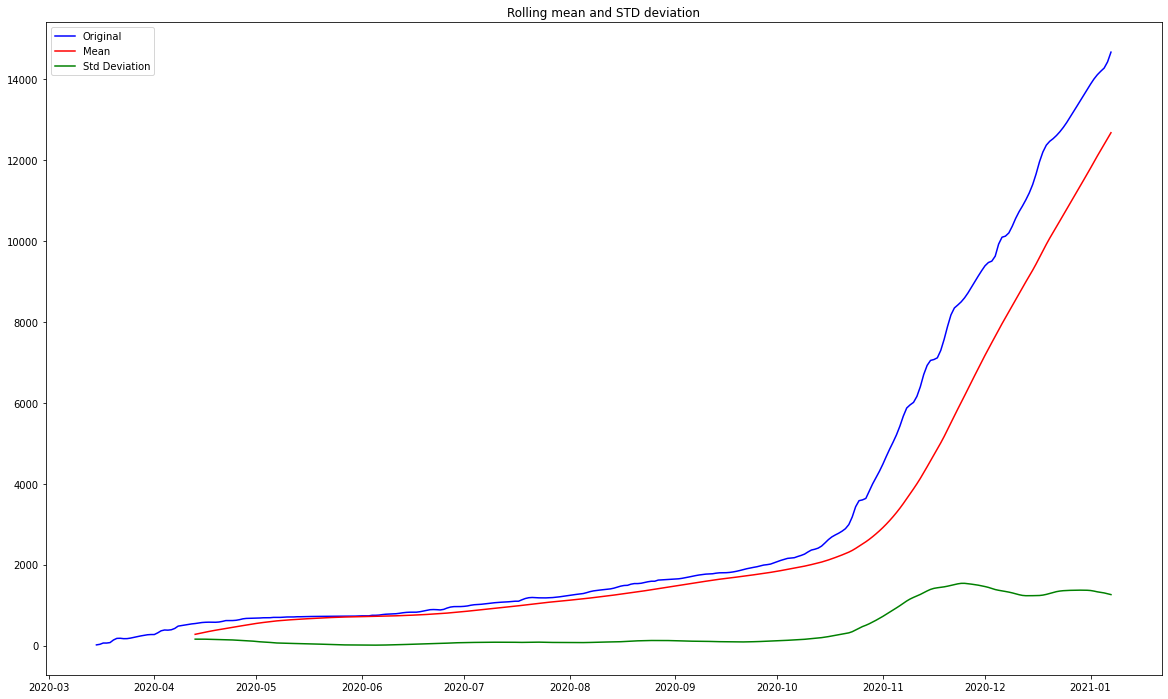

In [ ]:
plt.figure(figsize = (20,12))
original = plt.plot(df_interpolateValues, color= 'blue', label = 'Original')
mean = plt.plot(rolmean, color ='red', label= 'Mean' )
std = plt.plot(rolstd, color='green', label= 'Std Deviation')
plt.legend(loc='best')
plt.title('Rolling mean and STD deviation')
plt.show(block=False)

# Checking here for Dickey Full test

In [ ]:
#Testing for dickey fuller 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
### Dickey fuller test
#Ho(Null Hypothesis): It is non stationary
#H1(Alternate Hypothesis): It is stationary


def adfuller_test(cases):
    result=adfuller(cases)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df_interpolateValues['Dortmund'])

ADF Test Statistic : 1.211194705527583
p-value : 0.9960623226609101
#Lags Used : 7
Number of Observations Used : 291
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
df_interpolateValues_logScale = np.log(df_interpolateValues)

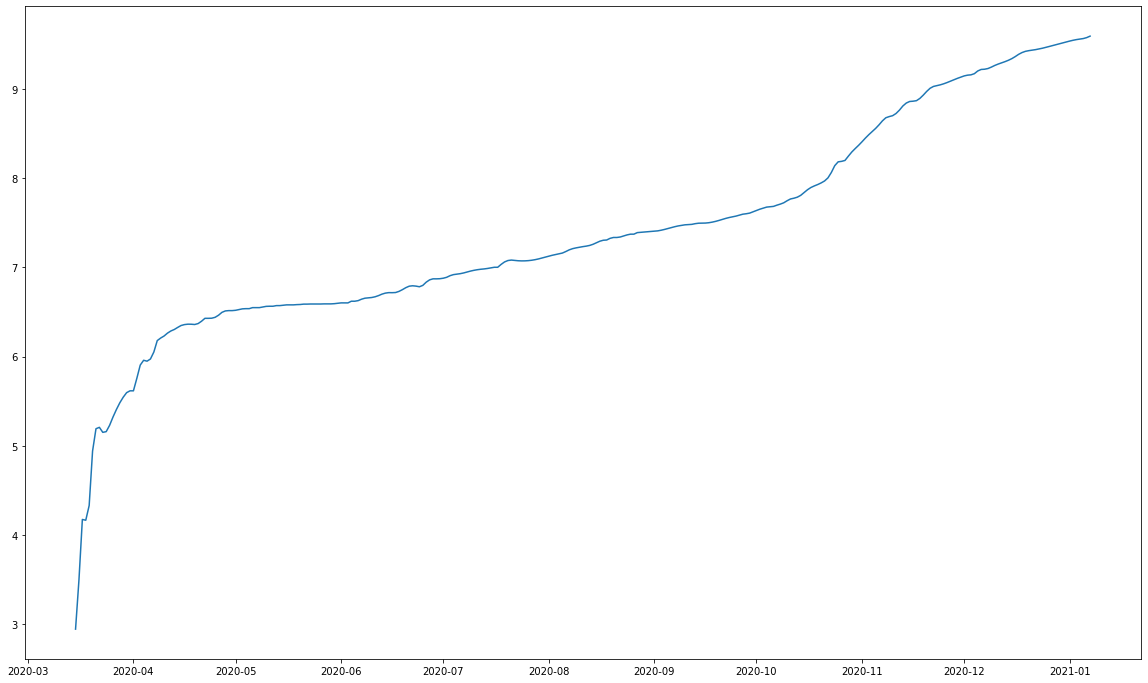

In [ ]:
plt.figure(figsize = (20,12))
plt.plot(df_interpolateValues_logScale)

# calculating moving average

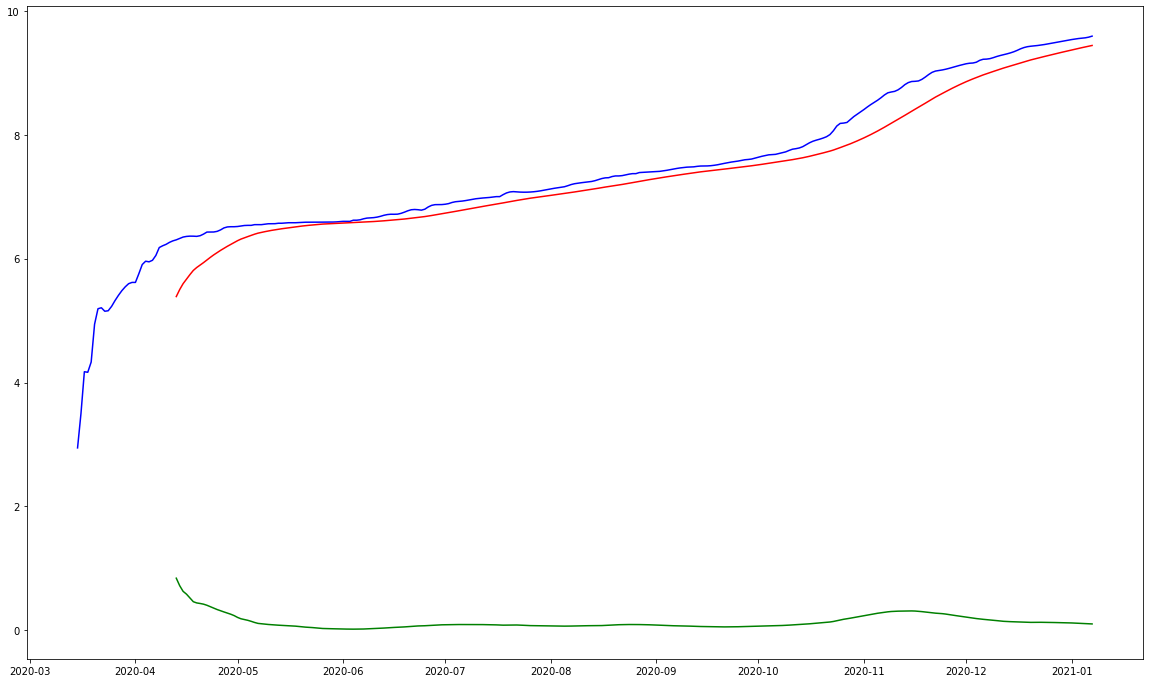

In [ ]:
movingAverage = df_interpolateValues_logScale.rolling(window=30).mean()
movingSTD = df_interpolateValues_logScale.rolling(window=30).std()
plt.figure(figsize = (20,12))
plt.plot(df_interpolateValues_logScale,color= 'blue', label='Log scale values')
plt.plot(movingAverage, label = 'Moving Avg', color='red')
plt.plot(movingSTD, label = 'Moving STD', color='green')

In [ ]:
#subtracting the moving average to make it stationary
df_LogScaling_Minus_MovingAverage = df_interpolateValues_logScale - movingAverage
df_LogScaling_Minus_MovingAverage.dropna(inplace= True)
df_LogScaling_Minus_MovingAverage

,Dortmund
Datum,
2020-04-13,0.916034
2020-04-14,0.826497
2020-04-15,0.752862
2020-04-16,0.690457
2020-04-17,0.621664
...,...
2021-01-03,0.159452
2021-01-04,0.153585
2021-01-05,0.147582


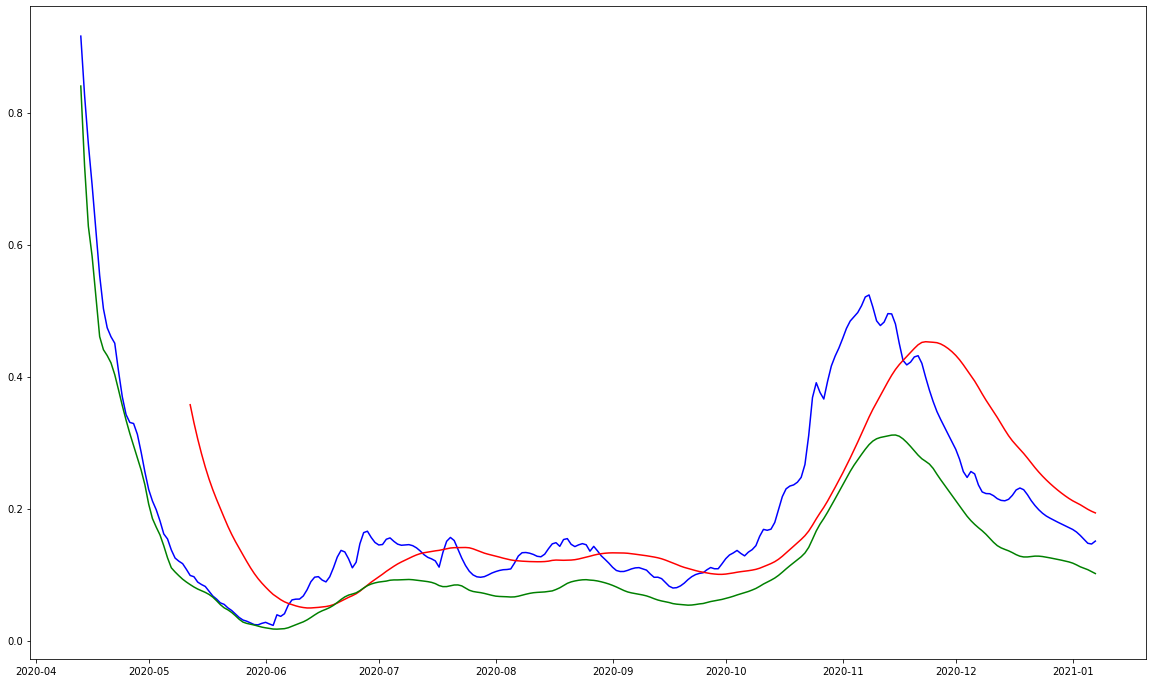

In [ ]:
#calculating moving average
logscale_Minus_movingAverage = df_LogScaling_Minus_MovingAverage.rolling(window=30).mean()
logscale_minus_movingSTD = df_interpolateValues_logScale.rolling(window=30).std()
plt.figure(figsize=(20,12))
plt.plot(df_LogScaling_Minus_MovingAverage,color= 'blue', label='Log scale values')
plt.plot(logscale_Minus_movingAverage, label = 'Moving Avg', color='red')
plt.plot(logscale_minus_movingSTD, label = 'Moving STD', color='green')

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

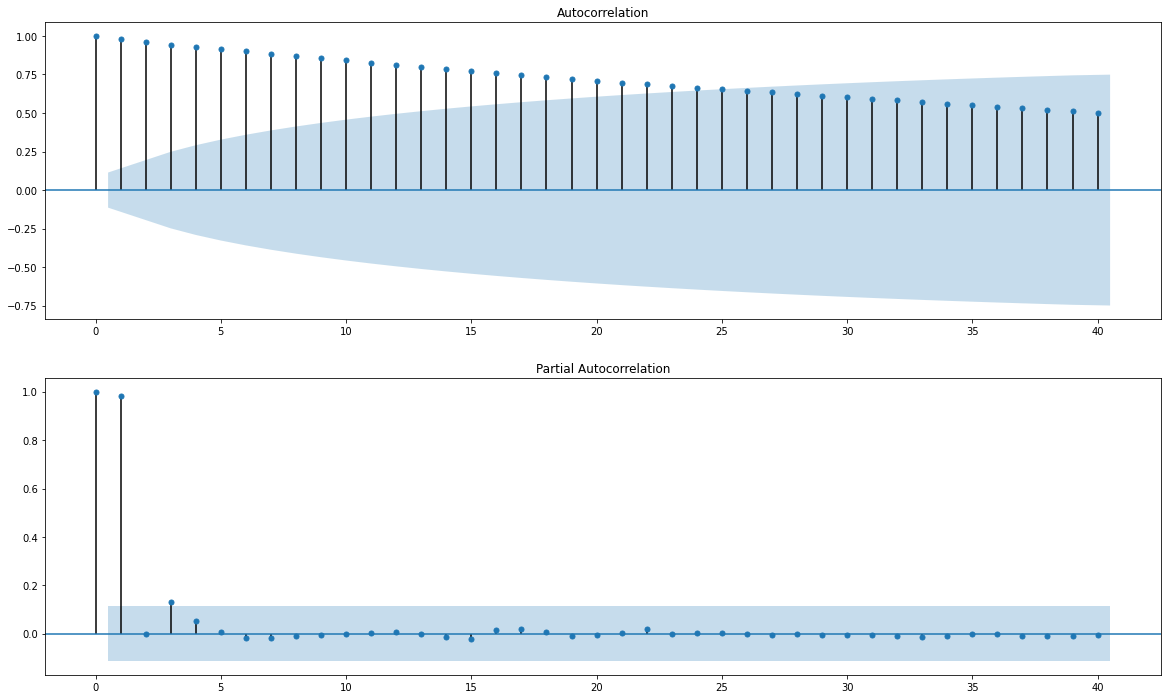

In [ ]:
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_interpolateValues_logScale.iloc[3:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_interpolateValues_logScale.iloc[3:],lags=40,ax=ax2)

In [ ]:
adfuller_test(df_LogScaling_Minus_MovingAverage['Dortmund'])

ADF Test Statistic : -1.8560741771934486
p-value : 0.35299875607219156
#Lags Used : 7
Number of Observations Used : 262
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# **No stationarity available in the above method of implementation, in the following method we are trying to make the data staionary using differencing


In [ ]:
df_interpolateValues_logScale_Differencing = (df_interpolateValues_logScale['Dortmund'] - df_interpolateValues_logScale['Dortmund'].shift(1)).dropna()

In [ ]:
print(df_interpolateValues_logScale_Differencing)

Datum
2020-03-16    0.552069
2020-03-17    0.677880
2020-03-18   -0.008621
2020-03-19    0.164967
2020-03-20    0.610909
                ...   
2021-01-03    0.007557
2021-01-04    0.006066
2021-01-05    0.005547
2021-01-06    0.010667
2021-01-07    0.016546
Freq: D, Name: Dortmund, Length: 298, dtype: float64


In [ ]:
adfuller_test(df_interpolateValues_logScale_Differencing)

ADF Test Statistic : -4.37084900869641
p-value : 0.0003341498314616658
#Lags Used : 16
Number of Observations Used : 281
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# Since the P value is less than 0.05 we can say that the data is stastationary 

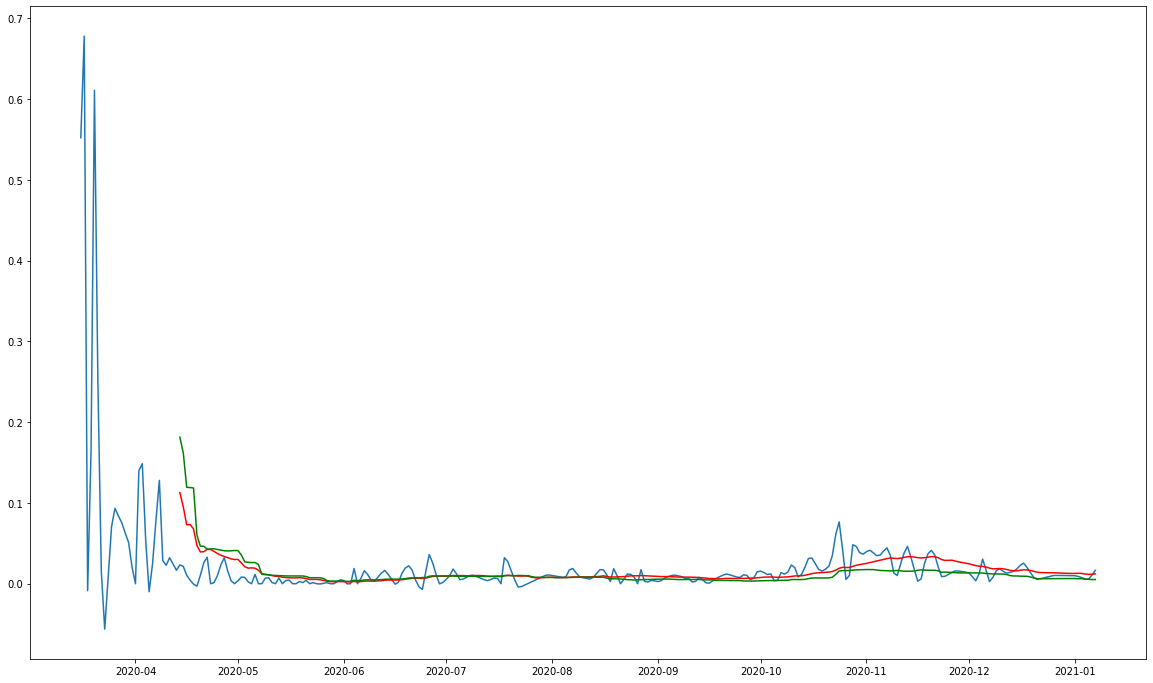

In [ ]:
mean_differencing =  df_interpolateValues_logScale_Differencing.rolling(window=30).mean()
std_differencing = df_interpolateValues_logScale_Differencing.rolling(window = 30).std()
plt.figure(figsize = (20,12))
plt.plot(df_interpolateValues_logScale_Differencing, label = 'First Order Differenencing')
plt.plot(mean_differencing, label = 'Moving Avg', color='red')
plt.plot(std_differencing, label = 'Moving STD', color='green')

# On the safer note checking for seasonality

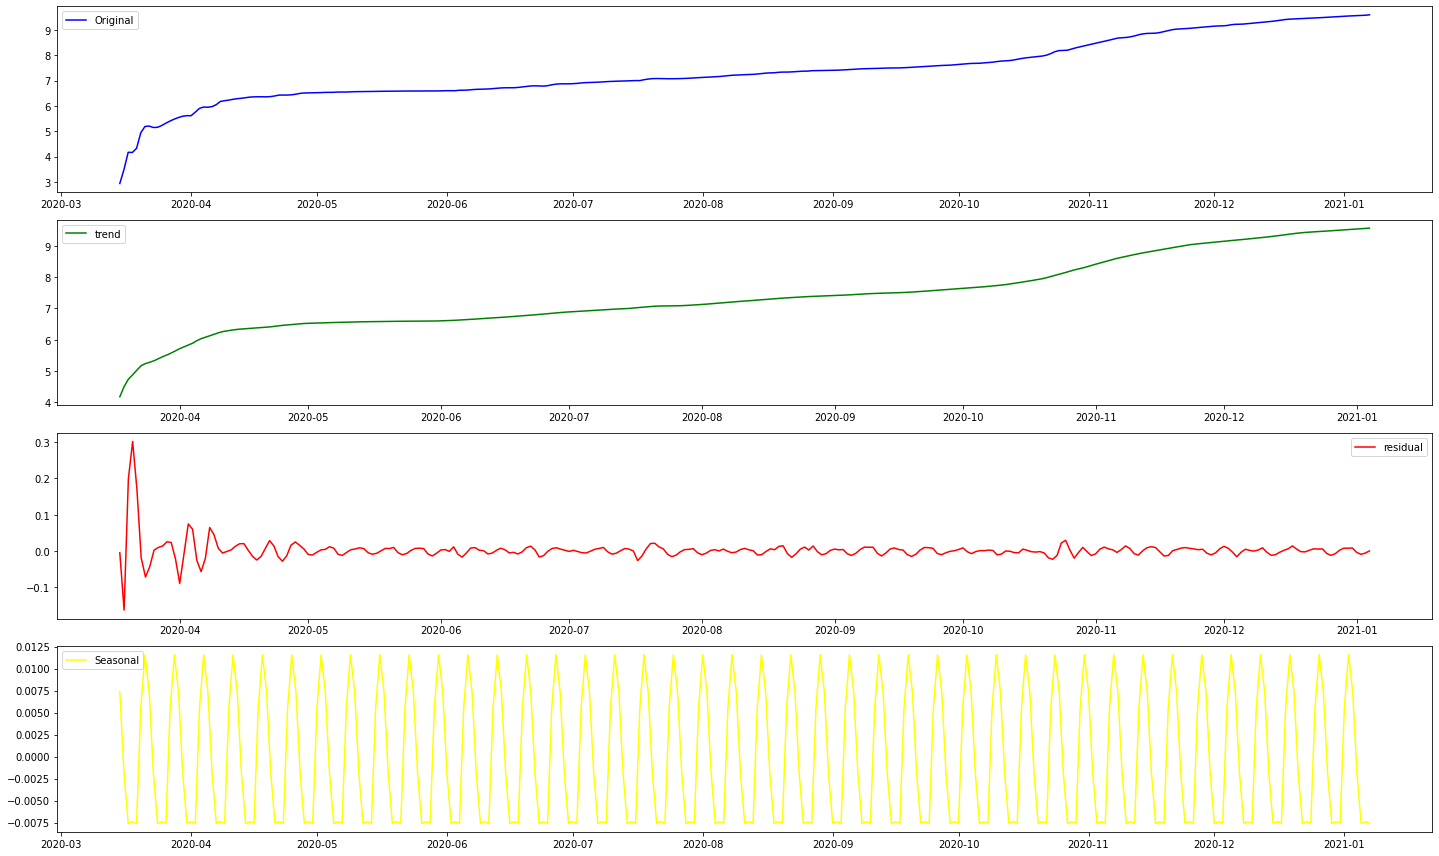

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_interpolateValues_logScale)

trend = decomposition.trend
residual = decomposition.resid
seasonal = decomposition.seasonal 


plt.figure(figsize = (20,12))

plt.subplot(411)
plt.plot(df_interpolateValues_logScale, color= 'blue', label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, color= 'green', label = 'trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(residual, color= 'red', label = 'residual')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(seasonal, color= 'yellow', label = 'Seasonal')
plt.legend(loc='best')
plt.tight_layout()

# **Plotting Autocorrelation and partial Autocorrelation**

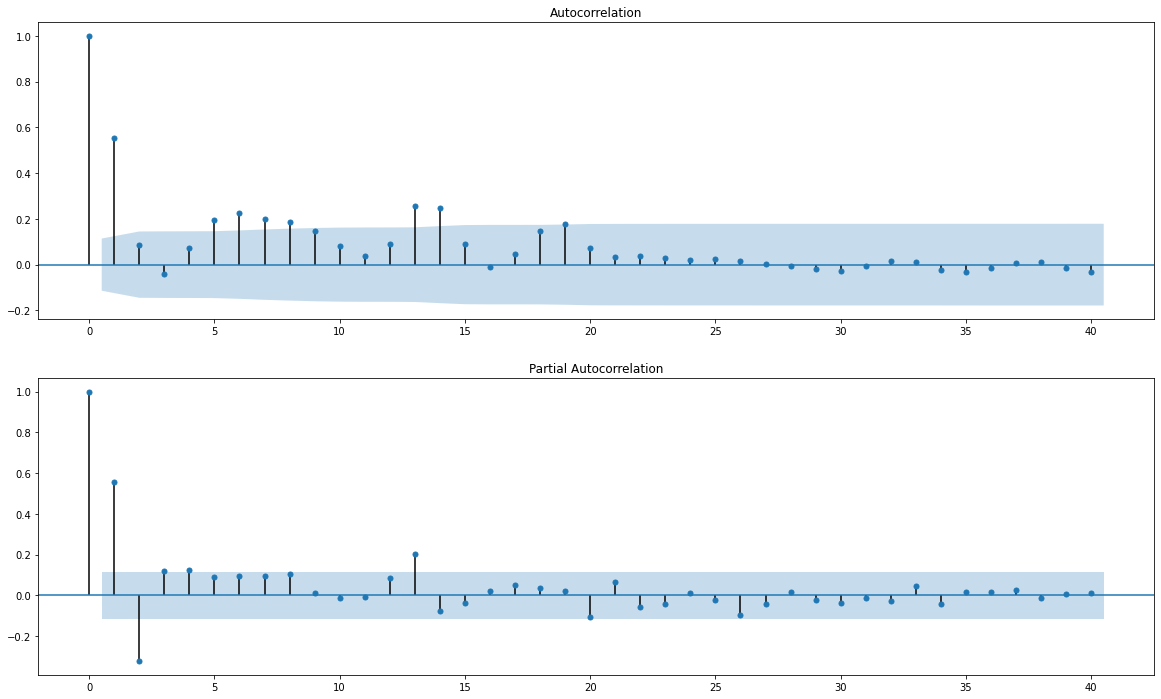

In [ ]:
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_interpolateValues_logScale_Differencing.iloc[3:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_interpolateValues_logScale_Differencing.iloc[3:],lags=40,ax=ax2)

# **In order to p and q value we have to check where the graph cuts to the zero, In above case, p=2 and q=2. Previously we got d as 1 since order of differecing is one.**

In [ ]:
! pip install pmdarima

     |████████████████████████████████| 1.5MB 8.4MB/s 
     |████████████████████████████████| 9.5MB 28.5MB/s 
     |████████████████████████████████| 2.1MB 51.4MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22


# checking best ARIMA model stats

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima
import warnings

In [ ]:
warnings.filterwarnings("ignore")
fit = auto_arima(df_interpolateValues_logScale_Differencing, trace = True, suppress_warnings= True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1078.497, Time=1.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-848.883, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-857.336, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-908.777, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-850.592, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-981.263, Time=0.74 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1084.171, Time=0.55 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-915.637, Time=0.51 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1077.279, Time=0.49 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1073.356, Time=0.72 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1078.756, Time=0.55 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1090.329, Time=0.98 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-1087.988, Time=1.15 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1087.944, Time=1.24 sec
 ARIMA(2,1,3)(0,0,0)[0] i

# **Here as we can see the Auto Arima model prediction the same model what we have dervied in the above ploting ACF and PACF.**

In [ ]:
model=ARIMA(df_interpolateValues_logScale_Differencing,order=(2,1,2))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.Dortmund   No. Observations:                  297
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 552.577
Method:                       css-mle   S.D. of innovations              0.037
Date:                Wed, 03 Mar 2021   AIC                          -1093.154
Time:                        17:45:26   BIC                          -1070.991
Sample:                    03-17-2020   HQIC                         -1084.281
                         - 01-07-2021                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0011      0.001     -1.204      0.230      -0.003       0.001
ar.L1.D.Dortmund    -0.3736      0.055     -6.776      0.000      -0.482      -0.266
ar.L2.D.Dortmund    -0.8656      0.072    -12.079      0.000      -1.006      -0.725
ma.L1.D.Dortmund     0.2019      0.072      2.803      0.005       0.061       0.343
ma.L2.D.Dortmund    -0.2565      0.076     -3.359      0.001      -0.406      -0.107
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2158           -1.0530j            1.0748           -0.2822
AR.2           -0.2158           +1.0530j            1.0748            0.2822
MA.1           -1.6198           +0.0000j            1.6198            0.5000
MA.2            2.4073           +0.0000j            2.4073            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
prediction_ARIMA_differencing = pd.Series(model_fit.fittedvalues, copy=True)
prediction_ARIMA_differencing

Datum
2020-03-17   -0.001109
2020-03-18   -0.023754
2020-03-19    0.117000
2020-03-20    0.564246
2020-03-21   -0.353388
                ...   
2021-01-03   -0.002414
2021-01-04   -0.001468
2021-01-05   -0.000838
2021-01-06   -0.000928
2021-01-07   -0.002808
Freq: D, Length: 297, dtype: float64

# converting to cummulative sum

In [ ]:
prediction_ARIMA_CummlativeSum = prediction_ARIMA_differencing.cumsum()
prediction_ARIMA_CummlativeSum

Datum
2020-03-17   -0.001109
2020-03-18   -0.024863
2020-03-19    0.092137
2020-03-20    0.656383
2020-03-21    0.302995
                ...   
2021-01-03   -0.028348
2021-01-04   -0.029816
2021-01-05   -0.030654
2021-01-06   -0.031582
2021-01-07   -0.034390
Freq: D, Length: 297, dtype: float64

In [ ]:
prediction_ARIMA_Log = pd.Series(df_interpolateValues_logScale['Dortmund'], df_interpolateValues_logScale.index)
prediction_ARIMA_Log = prediction_ARIMA_Log.add(prediction_ARIMA_CummlativeSum,fill_value=0)
prediction_ARIMA_Log

Datum
2020-03-15    2.944439
2020-03-16    3.496508
2020-03-17    4.173278
2020-03-18    4.140903
2020-03-19    4.422870
                ...   
2021-01-03    9.526795
2021-01-04    9.531392
2021-01-05    9.536101
2021-01-06    9.545840
2021-01-07    9.559578
Freq: D, Length: 299, dtype: float64

In [ ]:
prediction_ARIMA = np.exp(prediction_ARIMA_Log)
prediction_ARIMA

Datum
2020-03-15       19.000000
2020-03-16       33.000000
2020-03-17       64.927945
2020-03-18       62.859531
2020-03-19       83.335141
                  ...     
2021-01-03    13722.534203
2021-01-04    13785.774398
2021-01-05    13850.836280
2021-01-06    13986.394050
2021-01-07    14179.865758
Freq: D, Length: 299, dtype: float64

# Plotting the predicted values with comparison from current infection rate for the period of last 2 weeks

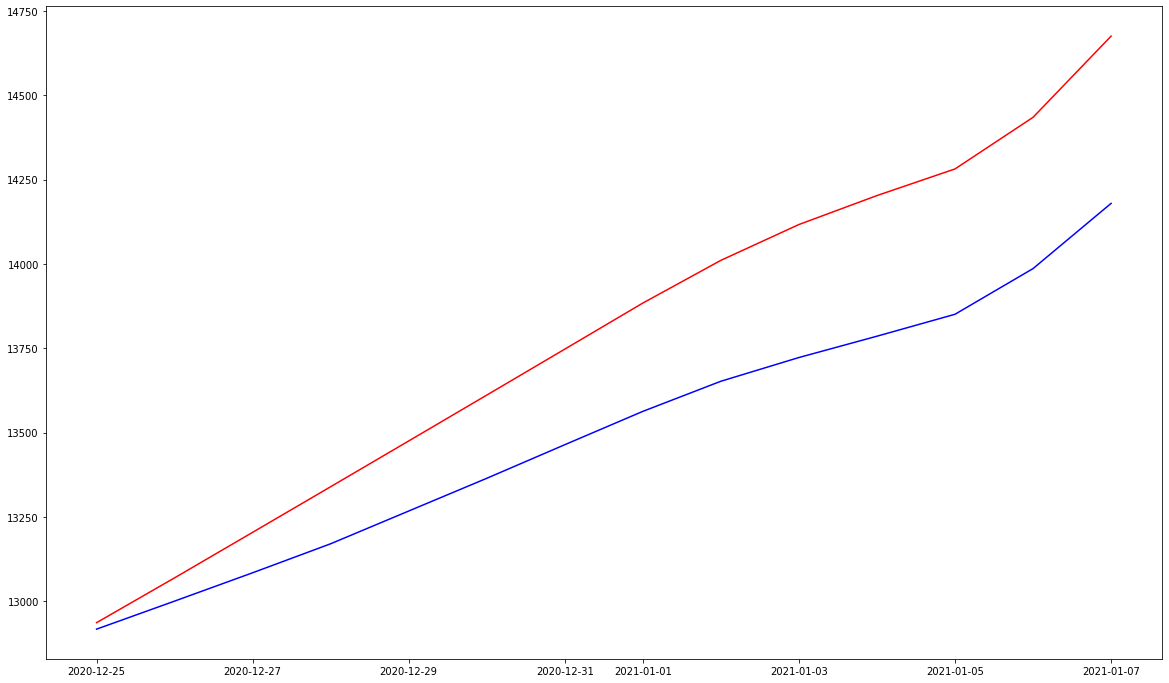

In [ ]:
plt.figure(figsize = (20,12))
plt.plot(prediction_ARIMA[-14:],color= 'blue', label = 'Predicted Infection rate')
plt.plot(df_interpolateValues[-14:],color= 'red', label = 'Current Infection rate')

# Plotting the predicted values with comparison from current infection rate for whole data set

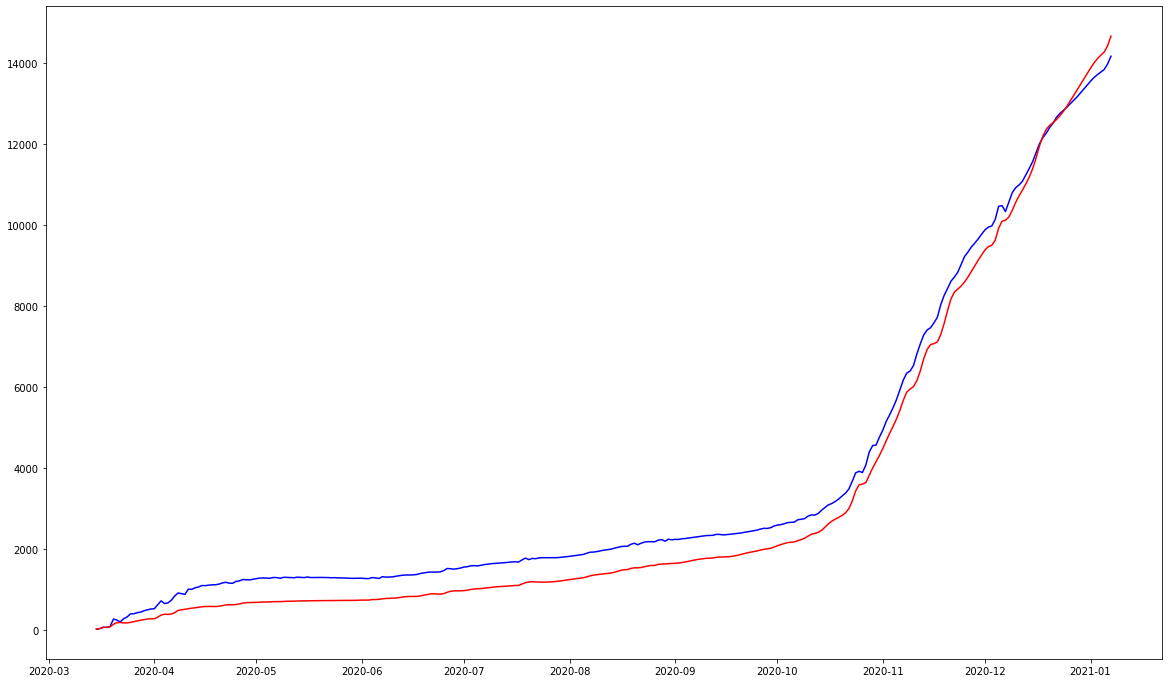

In [ ]:
plt.figure(figsize = (20,12))
plt.plot(prediction_ARIMA,color= 'blue', label = 'Predicted Infection rate')
plt.plot(df_interpolateValues,color= 'red', label = 'Current Infection rate')

# Predecting for the future infection rate

In [ ]:
model2=ARIMA(df_interpolateValues_logScale,order=(2,1,2))
model_fit2=model2.fit(transparams=False)
model_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.Dortmund   No. Observations:                  298
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 457.838
Method:                       css-mle   S.D. of innovations                nan
Date:                Wed, 03 Mar 2021   AIC                           -903.675
Time:                        17:45:27   BIC                           -881.493
Sample:                    03-16-2020   HQIC                          -894.796
                         - 01-07-2021                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0152      0.004      4.141      0.000       0.008       0.022
ar.L1.D.Dortmund     0.3527      0.063      5.588      0.000       0.229       0.476
ar.L2.D.Dortmund     0.1877      0.075      2.511      0.013       0.041       0.334
ma.L1.D.Dortmund     0.2083      0.012     17.107      0.000       0.184       0.232
ma.L2.D.Dortmund    -0.6543      0.003   -220.580      0.000      -0.660      -0.648
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5526           +0.0000j            1.5526            0.0000
AR.2           -3.4316           +0.0000j            3.4316            0.5000
MA.1           -1.0873           +0.0000j            1.0873            0.5000
MA.2            1.4056           +0.0000j            1.4056            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
prediction_ARIMA_differencing = pd.Series(model_fit2.fittedvalues, copy=True)
prediction_ARIMA_differencing

Datum
2020-03-16    0.015228
2020-03-17    0.172812
2020-03-18    0.110187
2020-03-19   -0.138135
2020-03-20    0.163275
                ...   
2021-01-03    0.014212
2021-01-04    0.013152
2021-01-05    0.013435
2021-01-06    0.013088
2021-01-07    0.016460
Freq: D, Length: 298, dtype: float64

In [ ]:
future1234 = model_fit2.predict(start=predict_data.index[0],end=predict_data.index[-1], typ='levels')
future1234

2021-01-08    9.610408
2021-01-09    9.626254
2021-01-10    9.641928
2021-01-11    9.657429
2021-01-12    9.672837
2021-01-13    9.688181
2021-01-14    9.703483
2021-01-15    9.718759
2021-01-16    9.734019
2021-01-17    9.749267
2021-01-18    9.764508
2021-01-19    9.779745
2021-01-20    9.794979
2021-01-21    9.810210
2021-01-22    9.825441
2021-01-23    9.840671
2021-01-24    9.855900
2021-01-25    9.871130
2021-01-26    9.886358
2021-01-27    9.901587
Freq: D, dtype: float64

In [ ]:
future_ARIMA = np.exp(future1234)
future_ARIMA

2021-01-08    14919.253469
2021-01-09    15157.550988
2021-01-10    15396.995684
2021-01-11    15637.530451
2021-01-12    15880.343891
2021-01-13    16125.876862
2021-01-14    16374.543597
2021-01-15    16626.604260
2021-01-16    16882.259019
2021-01-17    17141.657119
2021-01-18    17404.918363
2021-01-19    17672.142571
2021-01-20    17943.417142
2021-01-21    18218.821596
2021-01-22    18498.430669
2021-01-23    18782.316311
2021-01-24    19070.549004
2021-01-25    19363.198633
2021-01-26    19660.335054
2021-01-27    19962.028476
Freq: D, dtype: float64

In [ ]:
future_ARIMA

2021-01-08    14919.253469
2021-01-09    15157.550988
2021-01-10    15396.995684
2021-01-11    15637.530451
2021-01-12    15880.343891
2021-01-13    16125.876862
2021-01-14    16374.543597
2021-01-15    16626.604260
2021-01-16    16882.259019
2021-01-17    17141.657119
2021-01-18    17404.918363
2021-01-19    17672.142571
2021-01-20    17943.417142
2021-01-21    18218.821596
2021-01-22    18498.430669
2021-01-23    18782.316311
2021-01-24    19070.549004
2021-01-25    19363.198633
2021-01-26    19660.335054
2021-01-27    19962.028476
Freq: D, dtype: float64

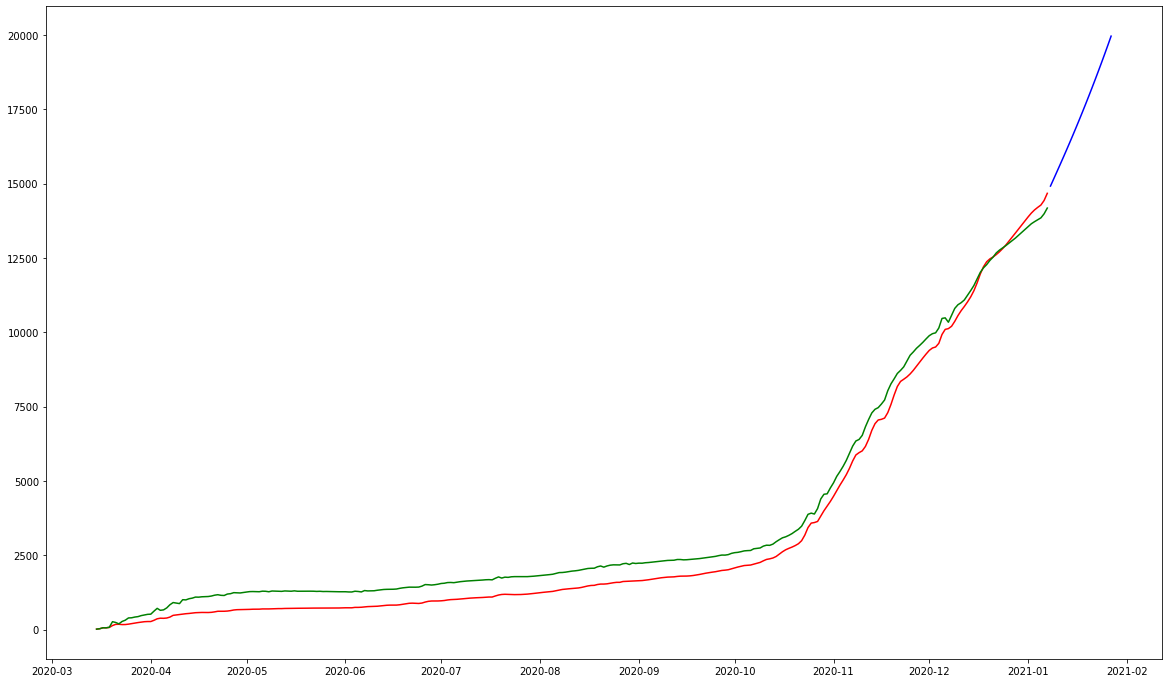

In [ ]:
plt.figure(figsize = (20,12))
plt.plot(future_ARIMA, color= 'blue', label = 'Future Forecast')
plt.plot(df_interpolateValues, color= 'red', label = 'Original Values')
plt.plot(prediction_ARIMA,color= 'green', label = 'ARIMA Prediction')